# Week12 Deep Learning and TensorFlow

# 0. "Defined-and-Run" vs "Defined-by-Run" 
## Defined-and-Run
- Network(or computational graph) is defined and fixed.
- And then mini-batch data are fed into the predefined network.
- TensorFlow, Caffe, torch.nn, and Theano-based frameworks

![Defined-and-Run](https://miro.medium.com/max/1200/1*0hPW23F_Y_TsQBH8PlLpMA.gif)

## Defined-by-Run
- Network is defined dynamically via the actual forward computation.
- This dynamic definition allows conditionals and loops into the network definitions easily.  
- Chainer, PyTorch

![Defined-and-Run](https://miro.medium.com/max/1200/1*m0qTLzOz-xMCdJEmcH6-pA.gif)

- https://medium.com/@zzemb6/define-and-run-vs-define-by-run-b527d127e13a

# 1. Tensorflow Basic with Session(Non-eager API, v1.x)
- Defined-and-Run
- Define computational graph, and run the session, feeding the data into graph

### Import TensorFlow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # Run the tensorflow like v1.x

Instructions for updating:
non-resource variables are not supported in the long term


### Constant
fixed value tensor, not trainable


In [2]:
hello = tf.constant('Hello, TensorFlow!')

sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [3]:
a = tf.constant(3)
b = tf.constant(5)

# launch the graph
sess = tf.Session()
print(sess.run(a+b))

8


In [5]:
# constants
mat_1 = tf.constant([[1,2],[3,4]])
mat_2 = tf.constant([[1,1],[1,1]])

# define operations
mat_product = tf.matmul(mat_1,mat_2)

# launch the graph
with tf.Session() as sess:
    print(sess.run(mat_product))

[[3 3]
 [7 7]]


### Placeholder & Operations
- **Placeholder** : tensors of values that are unknown during the graph construction, but passed as input during a session
- **Operations** : functions on tensors

In [6]:
# placeholders
a = tf.placeholder(tf.int32)
b = tf.placeholder(tf.int32)

# operations
add = tf.add(a,b)
mul = tf.multiply(a,b)

# launch the graphs
with tf.Session() as sess:
    print(sess.run(add,feed_dict={a:3,b:5})) # Feeding input data into placeholder
    print(sess.run(mul,feed_dict={a:3,b:5}))

8
15


### Example : Linear Regression with Tensorflow(Non-eager API)

### Load the Birth-Life Dataset

In [7]:
import pandas as pd

path_to_file = tf.keras.utils.get_file('birth_life_2010.txt', 'https://github.com/uzay00/KaVe/raw/master/2018/Lecture9/tf%20code/birth_life_2010.txt')
data = pd.read_csv(path_to_file, sep="\t")
data.head()


8192/5324 [==============================================] - 0s 0us/step


,Country,Birth rate,Life expectancy
0,Vietnam,1.822,74.828244
1,Vanuatu,3.869,70.819488
2,Tonga,3.911,72.150659
3,Timor-Leste,5.578,61.999854
4,Thailand,1.579,73.927659


In [8]:
birth_rate = data["Birth rate"].values
life_exp = data["Life expectancy"].values

data = list(zip(birth_rate, life_exp))
data = np.asarray(data, dtype=np.float32)

data.shape

(190, 2)

### Build the model
- **Variables** : tensors initialized in a session - trainable

In [9]:
# placeholders
X = tf.placeholder(tf.float32,name='X')
Y = tf.placeholder(tf.float32,name='Y')

# variables 
w = tf.get_variable('weight',initializer=tf.constant(0.0))
b = tf.get_variable('bias',initializer=tf.constant(0.0))

Y_predicted = w*X+b
loss = tf.square(Y-Y_predicted,name='loss')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

### Train the model

In [11]:
n_samples = len(data)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # 20 epoch
    for i in range(20):
        total_loss = 0
        
        # SGD
        for x, y in data:
            _,l=sess.run([optimizer,loss],feed_dict={X:x,Y:y})
            total_loss+=l
            
        print("Epoch {0}: {1}".format(i, total_loss / n_samples))
    
    w_out, b_out = sess.run([w, b])

Epoch 0: 490.15910439699593
Epoch 1: 263.7506495726148
Epoch 2: 159.3668263046365
Epoch 3: 101.52515189706618
Epoch 4: 69.41203513054275
Epoch 5: 51.53756947319244
Epoch 6: 41.554978463762
Epoch 7: 35.955185015482435
Epoch 8: 32.795872784100204
Epoch 9: 31.000304762651457
Epoch 10: 29.970263171720465
Epoch 11: 29.3725205919497
Epoch 12: 29.020745035464948
Epoch 13: 28.810279397442507
Epoch 14: 28.68194799397116
Epoch 15: 28.602074145584513
Epoch 16: 28.551256058196305
Epoch 17: 28.518195809317923
Epoch 18: 28.49622749929886
Epoch 19: 28.48135876765775


### Plot the result

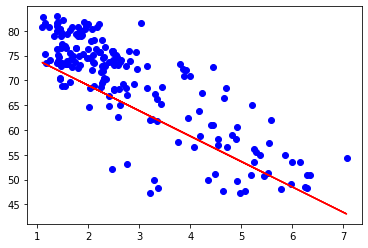

In [12]:
plt.plot(data[:,0], data[:,1], 'bo')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r')
plt.show()

# 2. Tensorflow Basic without Session(Eager API, v2.x)
- Defined-by-Run
- **Before run the bellow cell, restart the kernel(runtime)**

### Import TensorFlow

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

import tensorflow as tf

### Eager Execution

In [2]:
a = tf.constant(3)
b = tf.constant(5)

print(a + b)

tf.Tensor(8, shape=(), dtype=int32)


In [3]:
mat_1 = tf.constant([[1,2],[3,4]])
mat_2 = tf.constant([[1,1],[1,1]])

print(tf.matmul(mat_1,mat_2))

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32)


### Example: Linear Regression with Keras

### Load the Birth-Life Dataset

In [4]:
path_to_file = tf.keras.utils.get_file('birth_life_2010.txt',
'https://github.com/uzay00/KaVe/raw/master/2018/Lecture9/tf%20code/birth_life_2010.txt')
data = pd.read_csv(path_to_file, sep="\t")
data.head()

,Country,Birth rate,Life expectancy
0,Vietnam,1.822,74.828244
1,Vanuatu,3.869,70.819488
2,Tonga,3.911,72.150659
3,Timor-Leste,5.578,61.999854
4,Thailand,1.579,73.927659


In [5]:
birth_rate = data["Birth rate"].values
life_exp = data["Life expectancy"].values

data = list(zip(birth_rate, life_exp))
data = np.asarray(data, dtype=np.float32)

data.shape

(190, 2)

### Build the model

In [6]:
# build a sequential model
layers = tf.keras.layers

model = tf.keras.Sequential([
    layers.Dense(units=1,input_shape=[1])
])

In [7]:
# config the model
optimizer = tf.keras.optimizers.SGD(0.01)
model.compile(loss='mse',optimizer=optimizer)

### Train the model

In [8]:
# train the model
model.fit(birth_rate,life_exp,epochs=20,batch_size=1)

Train on 190 samples
Epoch 1/20
190/190 [==============================] - 0s 2ms/sample - loss: 907.2628
Epoch 2/20
190/190 [==============================] - 0s 823us/sample - loss: 234.0136
Epoch 3/20
190/190 [==============================] - 0s 786us/sample - loss: 77.9550
Epoch 4/20
190/190 [==============================] - 0s 744us/sample - loss: 46.5077s - loss: 49.31
Epoch 5/20
190/190 [==============================] - 0s 821us/sample - loss: 37.9283
Epoch 6/20
190/190 [==============================] - 0s 751us/sample - loss: 33.9263
Epoch 7/20
190/190 [==============================] - ETA: 0s - loss: 39.57 - 0s 749us/sample - loss: 36.1977
Epoch 8/20
190/190 [==============================] - 0s 740us/sample - loss: 34.9939
Epoch 9/20
190/190 [==============================] - 0s 766us/sample - loss: 35.4757
Epoch 10/20
190/190 [==============================] - 0s 766us/sample - loss: 36.0053
Epoch 11/20
190/190 [==============================] - 0s 760us/sample - loss: 

### Plot the result

In [9]:
w_out = model.layers[0].kernel[0]
b_out = model.layers[0].bias

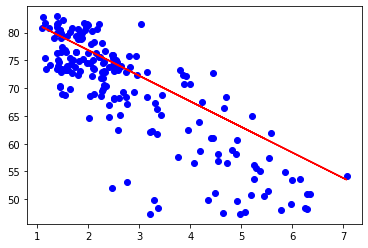

In [10]:
plt.plot(data[:,0], data[:,1], 'bo')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r')
plt.show()

# 3. Image Classification using Deep NN with Keras (Sequential API)

### Import TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Load and prepare the Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

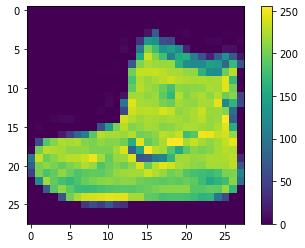

In [3]:
# show the image data 0
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

In [4]:
# scaling X
X_train, X_test = X_train/255.0,X_test/255.0

In [5]:
# class labels
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
# names for class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Ankle boot'

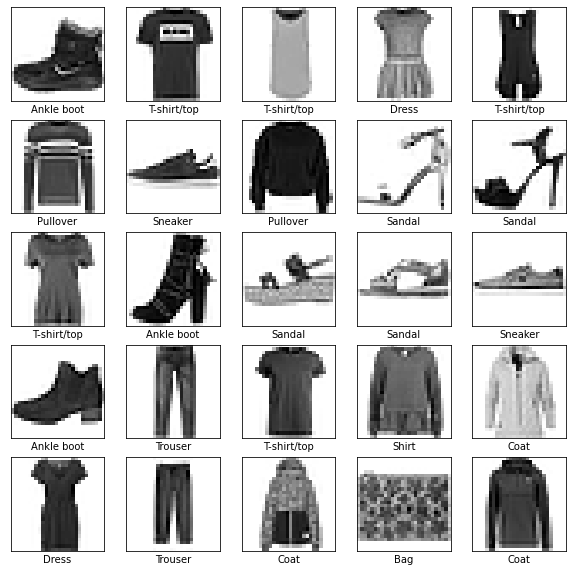

In [7]:
# show first 25 data and label
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### **[Recap]** : Scikit-learn Multi-layer Perceptron

In [8]:
from sklearn.neural_network import MLPClassifier

# build the model with 2 hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(128,128),
                   activation='relu',verbose=1,max_iter=20)

In [10]:
# flatten the data
X_train_1d = X_train.reshape(60000,784)
X_test_1d = X_test.reshape(10000,784)

In [11]:
# checking the execution time
import time
start_time = time.time()

# training the model
mlp.fit(X_train_1d,y_train)

print("Time : ", time.time()-start_time)

Iteration 1, loss = 0.56658710
Iteration 2, loss = 0.39354739
Iteration 3, loss = 0.35614879
Iteration 4, loss = 0.32779067
Iteration 5, loss = 0.31266193
Iteration 6, loss = 0.29393395
Iteration 7, loss = 0.28152066
Iteration 8, loss = 0.27168729
Iteration 9, loss = 0.25853401
Iteration 10, loss = 0.25379823
Iteration 11, loss = 0.24392495
Iteration 12, loss = 0.23363384
Iteration 13, loss = 0.22875879
Iteration 14, loss = 0.22100081
Iteration 15, loss = 0.21518493
Iteration 16, loss = 0.20878551
Iteration 17, loss = 0.20158339
Iteration 18, loss = 0.19538819
Iteration 19, loss = 0.19079992
Iteration 20, loss = 0.18504910
Time :  37.72580027580261


E:\Anaconda3\envs\TF\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [12]:
# Train accuracy
mlp.score(X_train_1d, y_train)

0.9343333333333333

In [13]:
# Test accuracy
mlp.score(X_test_1d, y_test)


0.8865

### Build the Deep Neural Network model 
Build the model by using `tf.keras.Sequential` API

In [14]:
# build the model with 3 fully connected layer
layers = tf.keras.layers

model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax'),])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Complie and Train the model
Choose an optimizer and loss function for training

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
# Checking the execution time
start_time = time.time()

# Training the model

model.fit(X_train,y_train,epochs=20,batch_size=200)

print("Time : ", time.time()-start_time)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.5713 - accuracy: 0.8002
Epoch 2/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.3927 - accuracy: 0.8600
Epoch 3/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.3472 - accuracy: 0.8741
Epoch 4/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3231 - accuracy: 0.8826
Epoch 5/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3088 - accuracy: 0.8876
Epoch 6/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.2917 - accuracy: 0.8926
Epoch 7/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.2783 - accuracy: 0.8974
Epoch 8/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.2670 - accuracy: 0.9023
Epoch 9/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.2559 - accuracy: 0.9053
Epoch 10/20
60

### **[Note] Advantage of using GPU**
>- **TensorFlow can process large batch sizes quickly through parallel computation using GPUs, so it is much faster than Scikit-learn**  
- Training time : TensorFlow <<< Scikit-learn

### Evaluate the model

In [18]:
loss, acc = model.evaluate(X_test,y_test)
print('Test Loss : %.4f' % loss)
print('Test Accuracy : %.4f' % acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3494 - accuracy: 0.8833
Test Loss : 0.3494
Test Accuracy : 0.8833


### Make prediction

In [19]:
predictions = model.predict(X_test)
predictions

array([[1.2427157e-07, 3.6517203e-10, 1.4118187e-07, ..., 4.0819994e-03,
        1.4472549e-07, 9.9591643e-01],
       [9.8478276e-06, 2.9756310e-16, 9.9982315e-01, ..., 1.0990810e-13,
        1.0590278e-10, 1.5737296e-14],
       [1.4684821e-12, 1.0000000e+00, 1.6418558e-14, ..., 9.4542563e-20,
        2.4327061e-14, 1.5342327e-18],
       ...,
       [5.7227926e-06, 1.5910728e-10, 7.2833865e-07, ..., 4.7751269e-07,
        9.9979490e-01, 9.4867181e-10],
       [5.1058522e-09, 9.9999988e-01, 2.8696232e-10, ..., 4.8131965e-15,
        4.4153492e-10, 5.7583877e-12],
       [3.2164994e-08, 4.9069937e-10, 5.1747566e-07, ..., 7.9574937e-05,
        1.2371763e-07, 5.4808602e-08]], dtype=float32)

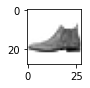

In [20]:
plt.figure(figsize=(1, 1))
plt.imshow(X_test[0], cmap=plt.cm.binary)
plt.show()

In [21]:
y_predicts = np.argmax(predictions[0])
print('True lable = %s' % class_names[y_test[0]])
print('Predicted = %s' % class_names[y_predicts])

True lable = Ankle boot
Predicted = Ankle boot


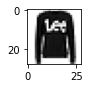

In [22]:
plt.figure(figsize=(1, 1))
plt.imshow(X_test[1], cmap=plt.cm.binary)
plt.show()

In [24]:
y_predicts = np.argmax(predictions[1])
print('True lable = %s' % class_names[y_test[1]])
print('Predicted = %s' % class_names[y_predicts])

True lable = Pullover
Predicted = Pullover


# 4. Image Classification using Deep NN with Keras(Subclassing API)

### Import Tensorflow

In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

### Load and prepare the Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0


## DataLoader : Load numpy array

In [3]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train, y_train)).shuffle(10000).batch(200)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(200)

## Build the Neural Networks model
Build the model by using `tf.keras.Model` API (subclassing API)

In [4]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(128, activation='relu')
        self.d3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        x = self.d2(x)
        return self.d3(x)

model = MyModel()

## Select the loss function and the optimizer

In [5]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam(0.001)

## Select metrics to measure the loss and the accuracy of the model

In [6]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

## Define train step
- Use tf.GradientTape to train the model

In [7]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

## Define test step
- No gradient update

In [8]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

## Train the model

In [9]:
EPOCHS = 20

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch: {}, Loss: {}, Train Accuracy: {}, Test Accuracy: {}'
  print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_accuracy.result()*100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch: 1, Loss: 0.5641942024230957, Train Accuracy: 80.47166442871094, Test Accuracy: 84.0999984741211
Epoch: 2, Loss: 0.4772602319717407, Train Accuracy: 83.2449951171875, Test Accuracy: 84.83999633789062
Epoch: 3, Loss: 0.43413645029067993, Train Accuracy: 84.62610626220703, Test Accuracy: 85.37333679199219
Epoch: 4, Loss: 0.40651649236679077, Train Accuracy: 85.51041412353516, Test Accuracy: 85.61250305175781
Epoch: 5, Loss: 0.38649922609329224, Train Accuracy: 86.15766906738281, Test Accuracy: 85.96

# 5. Overfitting & Underfitting

## Import tensorflow

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Load the IMDb Dataset

In [11]:
NUM_WORDS = 3000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=NUM_WORDS)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

E:\Anaconda3\envs\TF\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,)
(25000,)
(25000,)
(25000,)


E:\Anaconda3\envs\TF\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


## Multi-hot Encoding

[0. 1. 1. ... 0. 0. 0.]


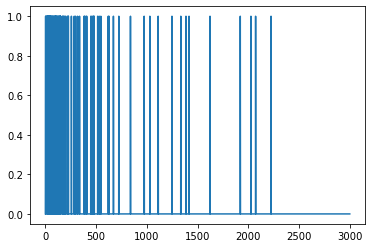

In [12]:
def multi_hot_encoding(seq, dims):
    results = np.zeros((len(seq), dims))

    for i, word_indices in enumerate(seq):
        results[i, word_indices] = 1.0
    
    return results

X_train = multi_hot_encoding(X_train, dims=NUM_WORDS)
X_test = multi_hot_encoding(X_test, dims=NUM_WORDS)

%matplotlib inline
print(X_train[0])
plt.plot(X_train[0])

## A Baseline Model


In [13]:
layers = tf.keras.layers

baseline_model = tf.keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(NUM_WORDS,)),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                48016     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 48,305
Trainable params: 48,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
baseline_history = baseline_model.fit(X_train,
                                     y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(X_test,y_test),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.5214 - accuracy: 0.7642 - binary_crossentropy: 0.5214 - val_loss: 0.3680 - val_accuracy: 0.8557 - val_binary_crossentropy: 0.3680
Epoch 2/20
25000/25000 - 1s - loss: 0.2991 - accuracy: 0.8850 - binary_crossentropy: 0.2991 - val_loss: 0.2993 - val_accuracy: 0.8788 - val_binary_crossentropy: 0.2993
Epoch 3/20
25000/25000 - 1s - loss: 0.2493 - accuracy: 0.9039 - binary_crossentropy: 0.2493 - val_loss: 0.2911 - val_accuracy: 0.8797 - val_binary_crossentropy: 0.2911
Epoch 4/20
25000/25000 - 1s - loss: 0.2280 - accuracy: 0.9125 - binary_crossentropy: 0.2280 - val_loss: 0.2979 - val_accuracy: 0.8758 - val_binary_crossentropy: 0.2979
Epoch 5/20
25000/25000 - 1s - loss: 0.2171 - accuracy: 0.9176 - binary_crossentropy: 0.2171 - val_loss: 0.3078 - val_accuracy: 0.8765 - val_binary_crossentropy: 0.3078
Epoch 6/20
25000/25000 - 1s - loss: 0.2077 - accuracy: 0.9204 - binary_crossentropy: 0.2077 - val_loss: 0.3161

## A Smaller Model


In [16]:
smaller_model = tf.keras.Sequential([
    layers.Dense(4,activation='relu',input_shape=(NUM_WORDS,)),
    layers.Dense(4,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
])
smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])


smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 12004     
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 12,029
Trainable params: 12,029
Non-trainable params: 0
_________________________________________________________________


In [17]:
smaller_history=smaller_model.fit(X_train,
                                 y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(X_test,y_test),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6279 - accuracy: 0.7166 - binary_crossentropy: 0.6279 - val_loss: 0.5473 - val_accuracy: 0.8181 - val_binary_crossentropy: 0.5473
Epoch 2/20
25000/25000 - 1s - loss: 0.4620 - accuracy: 0.8513 - binary_crossentropy: 0.4620 - val_loss: 0.3993 - val_accuracy: 0.8611 - val_binary_crossentropy: 0.3993
Epoch 3/20
25000/25000 - 1s - loss: 0.3376 - accuracy: 0.8820 - binary_crossentropy: 0.3376 - val_loss: 0.3262 - val_accuracy: 0.8755 - val_binary_crossentropy: 0.3262
Epoch 4/20
25000/25000 - 1s - loss: 0.2802 - accuracy: 0.8966 - binary_crossentropy: 0.2802 - val_loss: 0.3002 - val_accuracy: 0.8804 - val_binary_crossentropy: 0.3002
Epoch 5/20
25000/25000 - 1s - loss: 0.2515 - accuracy: 0.9060 - binary_crossentropy: 0.2515 - val_loss: 0.2952 - val_accuracy: 0.8812 - val_binary_crossentropy: 0.2952
Epoch 6/20
25000/25000 - 1s - loss: 0.2356 - accuracy: 0.9104 - binary_crossentropy: 0.2356 - val_loss: 0.2927

## Comparison models


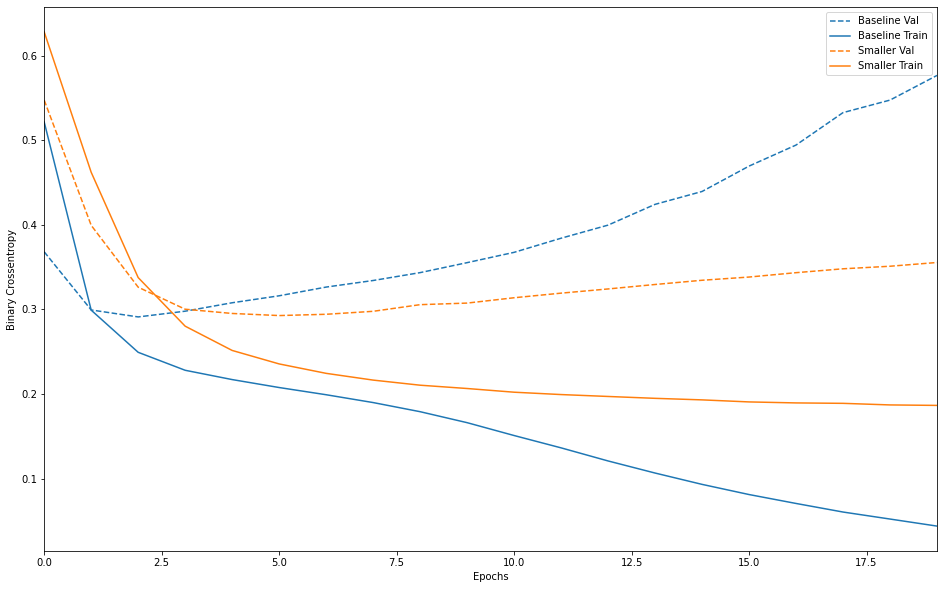

In [18]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history)])
#              ('bigger', bigger_history)])


## Avoiding Overfitting : L2 Regularization


In [19]:
l2_model = tf.keras.models.Sequential([
    layers.Dense(16,kernel_regularizer=tf.keras.regularizers.l2(0.001),
                activation='relu',input_shape=(NUM_WORDS,)),
    layers.Dense(16,kernel_regularizer=tf.keras.regularizers.l2(0.001),
                activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy','binary_crossentropy'])

l2_model_history = l2_model.fit(X_train,
                               y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(X_test,y_test),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.5667 - accuracy: 0.7719 - binary_crossentropy: 0.5241 - val_loss: 0.4115 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3701
Epoch 2/20
25000/25000 - 1s - loss: 0.3444 - accuracy: 0.8838 - binary_crossentropy: 0.3020 - val_loss: 0.3406 - val_accuracy: 0.8804 - val_binary_crossentropy: 0.2977
Epoch 3/20
25000/25000 - 1s - loss: 0.2963 - accuracy: 0.9016 - binary_crossentropy: 0.2531 - val_loss: 0.3342 - val_accuracy: 0.8804 - val_binary_crossentropy: 0.2909
Epoch 4/20
25000/25000 - 1s - loss: 0.2775 - accuracy: 0.9093 - binary_crossentropy: 0.2342 - val_loss: 0.3366 - val_accuracy: 0.8781 - val_binary_crossentropy: 0.2937
Epoch 5/20
25000/25000 - 1s - loss: 0.2682 - accuracy: 0.9131 - binary_crossentropy: 0.2254 - val_loss: 0.3412 - val_accuracy: 0.8772 - val_binary_crossentropy: 0.2987
Epoch 6/20
25000/25000 - 1s - loss: 0.2638 - accuracy: 0.9144 - binary_crossentropy: 0.2214 - val_loss: 0.3470

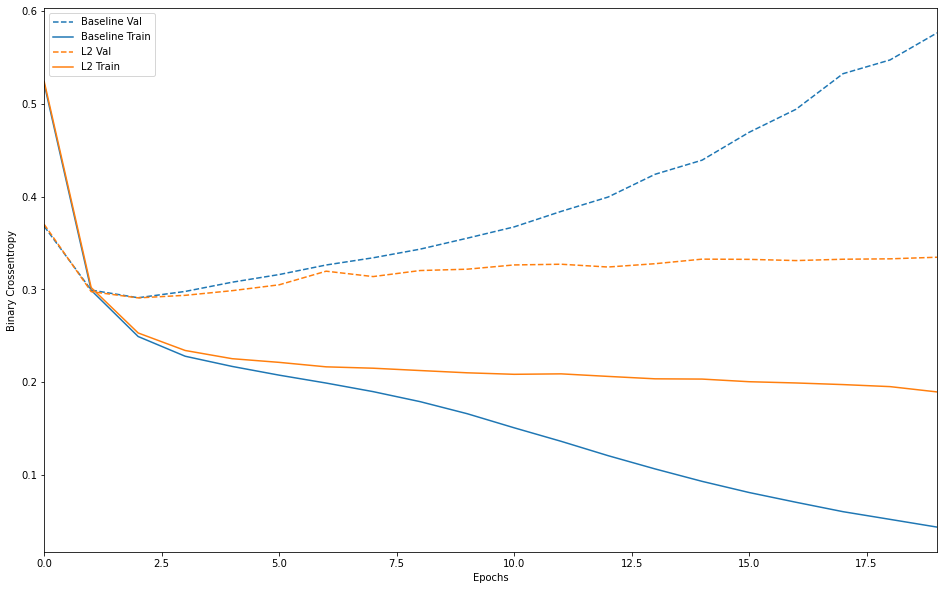

In [20]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

# Quiz : Build Neural Networks for image classification
- Dataset : CIFAR-10
- To do
  0. Build the Neural Networks with Scikit-learn
  1. Build the Neural Networks with Sequential API(`tf.keras.models.Sequential`)
  2. Build the Neural Networks with Subclasss API(`tf.keras.Model`)

## Import TensorFlow

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Load and prepare the CIFAR-10 dataset

In [0]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, x_test = X_train / 255.0, X_test / 255.0

In [0]:
X_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

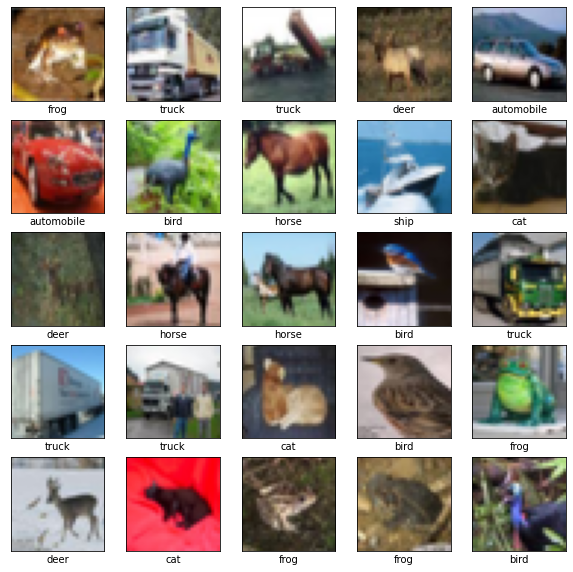

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## 0. Build the model with Scikit-learn


In [0]:
# Flatten the data
X_train_1d = X_train.reshape(50000, 32*32*3)
X_test_1d = X_test.reshape(10000, 32*32*3)

In [0]:
# Fill in the blnak : Build the model with Scikit-learn 







In [0]:
# Checking the execution time
import time
start_time = time.time()
None
print("Time : ", time.time()-start_time)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 2.33362301
Iteration 2, loss = 2.31320293
Iteration 3, loss = 2.30614769
Iteration 4, loss = 2.30368392
Iteration 5, loss = 2.30294129
Iteration 6, loss = 2.30277503
Iteration 7, loss = 2.30272145
Iteration 8, loss = 2.30270685
Iteration 9, loss = 2.30270984
Iteration 10, loss = 2.30270199
Iteration 11, loss = 2.30270796
Iteration 12, loss = 2.30271444
Iteration 13, loss = 2.30271456
Iteration 14, loss = 2.30271546
Iteration 15, loss = 2.30270600
Iteration 16, loss = 2.30270331
Iteration 17, loss = 2.30269793
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Time :  72.30770611763


In [0]:
mlp.score(X_train_1d, y_train)

0.1

In [0]:
mlp.score(X_test_1d, y_test)

0.1

## 1. Build the model with Sequential API(`tf.keras.models.Sequential`)

In [0]:
# Fill in the blnak : Build & Compile the model Sequential API










Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Train the model 
baseline_history = None

# Evaulate the model : hint : use '.evaluate()' method
None

Epoch 1/20
196/196 [==============================] - 1s 4ms/step - loss: 2.0274 - accuracy: 0.2750 - val_loss: 165.4251 - val_accuracy: 0.3176
Epoch 2/20
196/196 [==============================] - 1s 4ms/step - loss: 1.8370 - accuracy: 0.3488 - val_loss: 165.9108 - val_accuracy: 0.3503
Epoch 3/20
196/196 [==============================] - 1s 4ms/step - loss: 1.7817 - accuracy: 0.3739 - val_loss: 174.3137 - val_accuracy: 0.3488
Epoch 4/20
196/196 [==============================] - 1s 4ms/step - loss: 1.7524 - accuracy: 0.3851 - val_loss: 162.2017 - val_accuracy: 0.3896
Epoch 5/20
196/196 [==============================] - 1s 4ms/step - loss: 1.7264 - accuracy: 0.3968 - val_loss: 172.7870 - val_accuracy: 0.3806
Epoch 6/20
196/196 [==============================] - 1s 4ms/step - loss: 1.7147 - accuracy: 0.3973 - val_loss: 166.3523 - val_accuracy: 0.3923
Epoch 7/20
196/196 [==============================] - 1s 4ms/step - loss: 1.6912 - accuracy: 0.4094 - val_loss: 170.7604 - val_accuracy:

[195.12124633789062, 0.39430001378059387]

## 2. Build the model with Subclasss API(`tf.keras.Model`)

In [0]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

In [0]:
# Make DataLoader using tf.data.Dataset.from_tensor_slices()
train_ds = None
test_ds = None

In [0]:
# Fill in the blnak : Build  the model by subclassing tf.keras.Model API









#################################################
model = # your Neural Networks class name e.g. MyModel()

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [0]:
EPOCHS = 20

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch: {}, Train Loss: {}, Train Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch: 1, Train Loss: 1.9150220155715942, Train Accuracy: 31.38800048828125, Test Loss: 177.2480010986328, Test Accuracy: 34.4900016784668
Epoch: 2, Train Loss: 1.8360271453857422, Train Accuracy: 34.218997955322266, Test Loss: 170.81422424316406, Test Accuracy: 35.94499969482422
Epoch: 3, Train Loss: 1.7906724214553833, Train Accuracy: 35.882667541503906, Test Loss: 170.3977813720703, Test Accuracy: 36.81333541870117
Epoch: 4, Train Loss: 1.7599208354949951, Train Accuracy: 37.06449890136719, Test Loss